In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in the data and
df = pd.read_csv('survey_results_public.csv')

df.shape

#Extracting the columns we need
df_new = df.iloc[:,np.r_[0,1,2,3,5,6,7,8,9,10,11,12,19:37,39:43,58]].reset_index(drop=True)



In [3]:
df_new.columns,df_new.index

(Index(['ResponseId', 'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
        'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
        'YearsCodePro', 'DevType', 'OrgSize', 'LanguageHaveWorkedWith',
        'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
        'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
        'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
        'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
        'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
        'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
        'NEWCollabToolsWantToWorkWith', 'OpSysProfessional use',
        'OpSysPersonal use', 'VersionControlSystem', 'VCInteraction',
        'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
        'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
        'WorkExp'],
       dtype='object'),
 RangeIndex(start=0, stop=73268, step=1))

## Data Cleaning

In [4]:
# Handling missing data
df_new.dropna(subset =['DevType'],inplace=True)
df_new=df_new.reset_index(drop=True)
#df_new.dtypes

In [38]:

def unique_answers(df,column):
    '''
    INPUT 
        df - the column to be splitted
        column - the column name you want to obtain the unique answers from
        
    OUTPUT
    
        Unique_vals - A set containing all the possible (unique) answers in the column
    '''
    df1=df.dropna(subset = [column])
    Unique_vals = set()
    df1[column]=df1[column].str.split(';')
    for row in df1[column]:
        for role in row:
            Unique_vals.add(role)
    return(Unique_vals)



In [6]:
#Calling the function to obtain the possible(unique) answers for the necessary columns
from functions import unique_answers
Unique_current_languages = unique_answers(df_new,'LanguageHaveWorkedWith')
Unique_next_languages = unique_answers(df_new,'LanguageWantToWorkWith')
Unique_current_db = unique_answers(df_new,'DatabaseHaveWorkedWith')
Unique_next_db = unique_answers(df_new,'DatabaseWantToWorkWith')
Unique_current_platform = unique_answers(df_new,'PlatformHaveWorkedWith')
Unique_next_platform = unique_answers(df_new,'PlatformWantToWorkWith')
Unique_current_Webframe = unique_answers(df_new,'WebframeHaveWorkedWith')
Unique_next_Webframe = unique_answers(df_new,'WebframeWantToWorkWith')
     


ModuleNotFoundError: No module named 'functions'

In [40]:
def split_multiple_answers(df,column):
    '''
    This function split the column with multiple answers and convert each cell into a string

    INPUT 
        df - the column to be splitted
        column - the column name you want to obtain the unique answers from
        
    OUTPUT
    
        Unique_vals - A set containing all the possible (unique) answers in the column
    '''
    df = df.dropna(subset = [column])
    df[column] = df[column].str.split(';')
    
    return(df[column])


df_new['DevType'] = split_multiple_answers(df_new,'DevType')

In [9]:
df_new['DevType']

0        [Data scientist or machine learning specialist...
1                                  [Developer, full-stack]
2        [Developer, front-end, Developer, full-stack, ...
3                         [Developer, full-stack, Student]
4                                    [Developer, back-end]
                               ...                        
61297                                [Developer, back-end]
61298      [Data scientist or machine learning specialist]
61299    [Developer, full-stack, Developer, desktop or ...
61300    [Developer, front-end, Developer, desktop or e...
61301    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 61302, dtype: object

In [41]:
'''Using Pandas melt function to convert list-like column elements to separate rows 

1. Split DevType column list values (columns with individual list values are created).

2. Merge the new columns with the rest of the data set.

3. Drop the old names list column and then transform the new columns into separate rows using the melt function.

4. Additional column ‘variable’ containing the ids of the numeric columns is seen. This column is dropped and empty values are removed.'''

df_clean=df_new.DevType.apply(pd.Series) \
   .merge(df_new, right_index = True, left_index = True) \
   .drop(["DevType"], axis = 1) \
   .melt(id_vars = df.iloc[:,np.r_[0,1,2,3,5,6,7,8,9,10,12,19:37,39:43,58]], value_name = "DevType")\
   .dropna(subset=['DevType'])\
   .drop("variable", axis=1) 

In [12]:
df_clean.head(10)

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
0,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,NaN,Data scientist or machine learning specialist
1,4,I am a developer by profession,"Employed, full-time",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,NaN,"Developer, full-stack"
2,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, front-end"
3,8,I am a developer by profession,"Not employed, but looking for work",NaN,Some college/university study without earning ...,Online Courses or Certification,NaN,Coursera;Udemy,1,NaN,...,Linux-based;macOS,Windows,Git,Command-line,NaN,NaN,Google Chat;Microsoft Teams;Zoom,NaN,NaN,"Developer, full-stack"
4,9,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Coding Bootcamp,NaN,NaN,6,6,...,Windows,Windows,Git,Command-line;Dedicated version control GUI app...,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams,Microsoft Teams,6.0,"Developer, back-end"
5,10,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Fully remote,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,NaN,37,30,...,Windows,Windows,Git,Version control hosting service web GUI;Dedica...,NaN,NaN,Google Chat;Slack,Google Chat;Slack,NaN,"Developer, desktop or enterprise applications"
6,11,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Written Tutorial...,NaN,5,2,...,Windows;Windows Subsystem for Linux (WSL),Linux-based,Git,Code editor;Command-line,Confluence,NaN,Google Chat;Microsoft Teams;Slack;Zoom,Google Chat;Slack,NaN,"Developer, full-stack"
7,12,"I am not primarily a developer, but I write co...","Employed, full-time;Independent contractor, fr...",Fully remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,NaN,12,10,...,Linux-based;macOS;Windows,Linux-based;macOS,Git,Code editor;Dedicated version control GUI appl...,Confluence;Jira Work Management;Notion;Trello,Notion;Trello,Cisco Webex Teams;Google Chat;Microsoft Teams;...,Slack,14.0,Engineering manager
8,13,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,NaN,12,5,...,macOS,Linux-based,Git,Code editor;Command-line,Jira Work Management;Trello,Jira Work Management;Trello,Microsoft Teams;Slack;Zoom,Microsoft Teams;Slack,5.0,"Developer, full-stack"
9,14,I am a developer by profession,"Employed,

In [521]:
df_new.DevType[2]

'Developer, front-end;Developer, full-stack;Developer, back-end;Developer, desktop or enterprise applications;Developer, QA or test'

In [13]:
df_clean[df_clean.ResponseId==5]

,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
2,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, front-end"
61304,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, full-stack"
122606,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, back-end"
183908,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, desktop or enterprise applications"
245210,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,NaN,"Developer, QA or test"


In [568]:

#Which column has most of their values missing
df_clean.columns[df_clean.isnull().mean() >= 0.5]

Index(['LearnCodeCoursesCert', 'OfficeStackAsyncWantToWorkWith'], dtype='object')

In [217]:
'''
This output shows that 2 columns have more than half of their values missing - 

LearnCodeCoursesCert   and OfficeStackAsyncWantToWorkWith

'''
df_new.isnull().mean()

ResponseId                        0.000000
MainBranch                        0.000000
Employment                        0.000000
RemoteWork                        0.042641
EdLevel                           0.001011
LearnCode                         0.001109
LearnCodeOnline                   0.302796
LearnCodeCoursesCert              0.581824
YearsCode                         0.004062
YearsCodePro                      0.161430
DevType                           0.000000
OrgSize                           0.172458
LanguageHaveWorkedWith            0.007455
LanguageWantToWorkWith            0.062722
DatabaseHaveWorkedWith            0.134139
DatabaseWantToWorkWith            0.258882
PlatformHaveWorkedWith            0.268963
PlatformWantToWorkWith            0.402059
WebframeHaveWorkedWith            0.234201
WebframeWantToWorkWith            0.336433
MiscTechHaveWorkedWith            0.364833
MiscTechWantToWorkWith            0.477162
ToolsTechHaveWorkedWith           0.222913
ToolsTechWa

In [522]:
df_new['DevType'][10]

'Developer, full-stack;Academic researcher;DevOps specialist'

In [17]:
DevType_count=(df_clean['DevType'].value_counts()/df_new['DevType'].shape[0]).reset_index().rename(columns={'index':'Role','DevType':'count'})
DevType_count.columns=['Role','count']
DevType_count

,Role,count
0,"Developer, full-stack",0.468190
1,"Developer, back-end",0.433836
2,"Developer, front-end",0.259616
3,"Developer, desktop or enterprise applications",0.155721
4,"Developer, mobile",0.124531
5,DevOps specialist,0.100649
6,Student,0.091269
7,Cloud infrastructure engineer,0.086180
8,Database administrator,0.080487
9,System administrator,0.080063


In [527]:
df_clean['DevType']

0        Data scientist or machine learning specialist;...
1                                    Developer, full-stack
2        Developer, front-end;Developer, full-stack;Dev...
3                            Developer, full-stack;Student
4                                      Developer, back-end
                               ...                        
61297                                  Developer, back-end
61298        Data scientist or machine learning specialist
61299    Developer, full-stack;Developer, desktop or en...
61300    Developer, front-end;Developer, desktop or ent...
61301    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [8]:
# A horizontal bar chart showing the proportion

plt.figure(figsize=(10,10))
plt.barh(DevType_count['Role'],DevType_count['count'])
plt.title("Which of the following describes your current job?")
plt.show


NameError: name 'DevType_count' is not defined

<Figure size 720x720 with 0 Axes>

In [27]:
DevType_count['Role'],DevType_count['count']

(0                             Developer, full-stack
 1                               Developer, back-end
 2                              Developer, front-end
 3     Developer, desktop or enterprise applications
 4                                 Developer, mobile
 5                                 DevOps specialist
 6                                           Student
 7                     Cloud infrastructure engineer
 8                            Database administrator
 9                              System administrator
 10      Developer, embedded applications or devices
 11                                  Project manager
 12                                         Designer
 13                                   Engineer, data
 14                              Engineering manager
 15    Data scientist or machine learning specialist
 16                         Data or business analyst
 17                            Developer, QA or test
 18                              Academic rese

In [ ]:
Data or business analyst
Data scientist or machine learning specialist
Developer, back-end
Developer, front-end
Developer, full-stack
DevOps specialist
Designer
Developer, embedded applications or devices

In [583]:
#The average years of experience for the different roles
df_clean.groupby(['DevType'])['WorkExp'].mean().sort_values()


DevType
Student                                           5.032353
Developer, front-end                              9.822250
Developer, mobile                                10.379075
Data scientist or machine learning specialist    10.380952
Developer, full-stack                            10.386392
Developer, back-end                              10.651393
Blockchain                                       10.679144
Academic researcher                              10.806090
Developer, QA or test                            11.554845
Engineer, data                                   11.702923
Developer, game or graphics                      11.969399
Cloud infrastructure engineer                    12.189419
DevOps specialist                                12.407099
Scientist                                        12.410169
Developer, embedded applications or devices      12.638144
Engineer, site reliability                       13.036458
Developer, desktop or enterprise applications   

In [318]:
## Create a DataFrame index object/pandas series
idx = pd.Index(sorted(Unique_roles))
#idx = pd.Series(sorted(Unique_roles))


Describe= pd.DataFrame()

for role in sorted(Unique_roles):
    Describe=Describe.append(df_clean[df_clean['DevType']==role].isnull().mean(),ignore_index=True)
    #Describe=pd.concat([Describe,pd.Series(role)])
    
# Set the above DataFrame index object as the index
# using set_index() function
Describe.set_index(idx,inplace=True)
Describe


,ResponseId,MainBranch,Employment,RemoteWork,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
Academic researcher,0.0,0.0,0.0,0.043928,0.001107,0.002215,0.310447,0.660391,0.008121,0.335179,...,0.057217,0.017350,0.008859,0.056478,0.514581,0.673311,0.095607,0.301956,0.539313,0.0
Blockchain,0.0,0.0,0.0,0.047619,0.002304,0.003072,0.281106,0.557604,0.014593,0.224270,...,0.082181,0.019201,0.005376,0.026882,0.228879,0.453149,0.122888,0.329493,0.425499,0.0
Cloud infrastructure engineer,0.0,0.0,0.0,0.007382,0.000568,0.000757,0.274276,0.589816,0.003407,0.080825,...,0.032936,0.007382,0.002082,0.009275,0.212569,0.462995,0.039182,0.208404,0.309483,0.0
Data or business analyst,0.0,0.0,0.0,0.026554,0.001562,0.000937,0.246798,0.492971,0.007185,0.147454,...,0.054983,0.017182,0.007810,0.096845,0.359575,0.541081,0.087160,0.272102,0.404561,0.0
Data scientist or machine learning specialist,0.0,0.0,0.0,0.036215,0.000876,0.000876,0.286215,0.533879,0.006133,0.206484,...,0.047313,0.014311,0.004965,0.047897,0.323890,0.525409,0.070678,0.264019,0.417348,0.0
Database administrator,0.0,0.0,0.0,0.017430,0.001419,0.001013,0.249493,0.604378,0.005675,0.123835,...,0.045602,0.011350,0.005067,0.061005,0.365829,0.548439,0.118160,0.299554,0.387921,0.0
Designer,0.0,0.0,0.0,0.047024,0.002391,0.001328,0.241764,0.583953,0.005579,0.208555,...,0.060840,0.015409,0.007705,0.072795,0.391870,0.560043,0.144793,0.342721,0.484857,0.0
DevOps specialist,0.0,0.0,0.0,0.010049,0.000324,0.000972,0.262237,0.590276,0.002593,0.087034,...,0.033712,0.007780,0.001945,0.008590,0.227877,0.465640,0.046353,0.218801,0.319611,0.0
"Developer, QA or test",0.0,0.0,0.0,0.018734,0.002261,0.001615,0.249031,0.563307,0.004845,0.124354,...,0.044574,0.012274,0.003230,0.024871,0.279070,0.481589,0.067829,0.257752,0.343346,0.0
"Developer, back-end",0.0,0.0,0.0,0.025531,0.001166,0.000978,0.293063,0.589284,0.002895,0.117503,...,0.039067,0.008836,0.002369,0.019214,0.273059,0.495055,0.079601,0.263019,0.357473,0.0


In [ ]:
Describe.head()
#print(f' Missing values:', {role},Describe.append(df_clean[df_clean['DevType']==role].isnull().mean(),ignore_index=True))


### TopTechnologies/tools most worked with, and wanted

In [42]:
#Calling the function to obtain the possible(unique) answers for the necessary columns

df_clean['LanguageHaveWorkedWith']= split_multiple_answers(df_new,'LanguageHaveWorkedWith')
df_clean['LanguageWantToWorkWith']=split_multiple_answers(df_new,'LanguageWantToWorkWith')
df_clean['DatabaseHaveWorkedWith']=split_multiple_answers(df_new,'DatabaseHaveWorkedWith')
df_clean['DatabaseWantToWorkWith']=split_multiple_answers(df_new,'DatabaseWantToWorkWith')
df_clean['PlatformHaveWorkedWith']=split_multiple_answers(df_new,'PlatformHaveWorkedWith')
df_clean['PlatformWantToWorkWith']=split_multiple_answers(df_new,'PlatformWantToWorkWith')
df_clean['WebframeHaveWorkedWith']=split_multiple_answers(df_new,'WebframeHaveWorkedWith')
df_clean['WebframeWantToWorkWith']=split_multiple_answers(df_new,'WebframeWantToWorkWith')

C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/641629510.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.split(';')


#### Programming, scripting, and markup languages

In [43]:
'''

Using Pandas melt function to convert list-like column elements to separate rows 

1. Split DevType column list values (columns with individual list values are created).

2. Merge the new columns with the rest of the data set.

3. Drop the old names list column and then transform the new columns into separate rows using the melt function.

4. Additional column ‘variable’ containing the ids of the numeric columns is seen. This column is dropped and empty values are removed.

'''


#Programming, scripting, and markup languages-  Worked with



df_lang=df_clean.LanguageHaveWorkedWith.apply(pd.Series) \
   .merge(df_clean, right_index = True, left_index = True) \
   .drop(["LanguageHaveWorkedWith"], axis = 1) \
   .melt(id_vars = df.iloc[:,np.r_[0,1,2,3,5,6,7,8,9,10,11,12,20:37,39:43,58]], value_name = "LanguageHaveWorkedWith")\
   .dropna(subset=['LanguageHaveWorkedWith'])\
   .drop("variable", axis=1) 





#Programming, scripting, and markup languages-  Want to work with


df_lang_wanted=df_clean.LanguageWantToWorkWith.apply(pd.Series) \
   .merge(df_clean, right_index = True, left_index = True) \
   .drop(["LanguageWantToWorkWith"], axis = 1) \
   .melt(id_vars = df_new.loc[:,df_new.columns!='LanguageWantToWorkWith'], value_name = "LanguageWantToWorkWith")\
   .dropna(subset=['LanguageWantToWorkWith'])\
   .drop("variable", axis=1) 
df_clean['LanguageHaveWorkedWith']

0                    [C#, C++, HTML/CSS, JavaScript, Python]
1                          [C#, JavaScript, SQL, TypeScript]
2          [C#, HTML/CSS, JavaScript, SQL, Swift, TypeScr...
3                  [C, C++, HTML/CSS, Java, JavaScript, SQL]
4                                                        NaN
                                 ...                        
1764589                                                  NaN
1768822                                                  NaN
1773947                                                  NaN
1774051                                                  NaN
1775044                                                  NaN
Name: LanguageHaveWorkedWith, Length: 164790, dtype: object

In [66]:
'''

Using Pandas melt function to convert list-like column elements to separate rows 

1. Split DevType column list values (columns with individual list values are created).

2. Merge the new columns with the rest of the data set.

3. Drop the old names list column and then transform the new columns into separate rows using the melt function.

4. Additional column ‘variable’ containing the ids of the numeric columns is seen. This column is dropped and empty values are removed.

'''


#Programming, scripting, and markup languages-  Worked with

def clean_and_plot(col1,col2,role):

    df1 = df_clean[col1].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col1], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col1], value_name = col1)\
       .dropna(subset=[col1])\
       .drop("variable", axis=1) 

    f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
    
    df2 = df_clean[col2].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col2], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col2], value_name = col2)\
       .dropna(subset=[col2])\
       .drop("variable", axis=1) 

    g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]    
    
    fig, axs = plt.subplots(1,2,figsize=(10,5))
    
    f.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[0],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
    axs[0].set_title(col1, fontsize='medium')
    #axs[0].plot(f.T[role].sort_values(ascending=False).head(5), color='blue')    

    g.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[1],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
    axs[1].set_title(col2, fontsize='medium')

    #axs[1].plot(g.T[role].sort_values(ascending=False).head(5), color='green') 


    for c in axs[0].containers:
    # set the bar label
     axs[0].bar_label(c, fmt="%.1f%%",fontweight ='bold', label_type='center',color='white')
    for c in axs[1].containers:
    # set the bar label
     axs[1].bar_label(c, fmt='%.1f%%',fontweight ='bold', label_type='center',color='white')
        

    #axs[1].set_xlabel(col2,fontweight ='bold')
    #axs.set_title(role,fontsize='large', loc='center')
    fig.suptitle(f'Current job: {role}',fontweight ='bold')
    fig.tight_layout()
    plt.show()
#clean_and_plot('LanguageHaveWorkedWith','LanguageWantToWorkWith','Developer, back-end')

C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/678605884.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/678605884.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


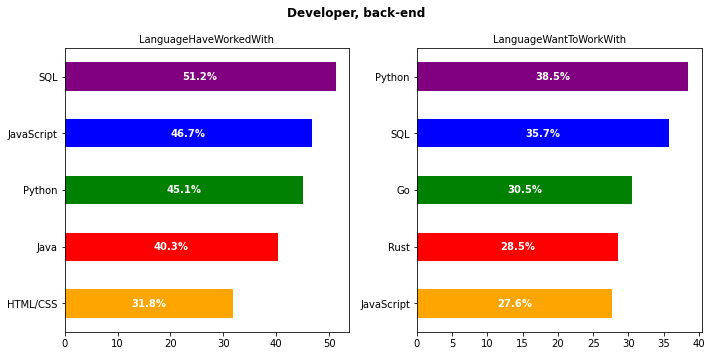

In [65]:
clean_and_plot('LanguageHaveWorkedWith','LanguageWantToWorkWith','Developer, back-end')

In [145]:
df1.groupby(['DevType'])['LanguageHaveWorkedWith'].value_counts(normalize=True).mul(100).unstack().fillna(0)

LanguageHaveWorkedWith,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,R,Ruby,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA
DevType,,,,,,,,,,,,,,,,,,,,,
Academic researcher,0.770548,1.669521,7.876712,7.063356,2.097603,8.604452,0.085616,0.256849,0.085616,0.385274,...,6.207192,0.642123,2.996575,0.256849,3.938356,0.428082,0.342466,0.256849,1.755137,0.470890
Blockchain,1.379310,2.413793,5.517241,4.827586,3.103448,5.172414,0.689655,0.689655,0.689655,0.689655,...,0.689655,1.724138,5.517241,0.689655,4.482759,1.034483,6.206897,1.034483,5.517241,0.689655
Cloud infrastructure engineer,0.401606,1.606426,11.345382,4.216867,3.313253,3.714859,0.200803,0.301205,0.100402,0.803213,...,0.903614,1.907631,3.614458,0.000000,8.132530,0.602410,0.000000,0.803213,3.514056,0.401606
Data or business analyst,0.514933,0.308960,4.428424,1.647786,2.883625,2.677652,0.102987,0.308960,0.205973,0.308960,...,8.650875,0.720906,0.411946,1.441813,19.670443,0.823893,0.308960,0.617920,1.647786,6.694130
Data scientist or machine learning specialist,0.308046,1.117318,6.625594,3.879288,3.101342,5.189788,0.250613,0.459458,0.224508,0.882368,...,4.839973,0.877147,1.790842,0.663082,10.285595,1.132982,0.469900,0.757062,3.331071,1.211298
Database administrator,0.807754,0.646204,8.400646,1.615509,5.169628,1.777060,0.161551,0.000000,0.323102,0.323102,...,1.453958,1.938611,1.130856,0.000000,18.578352,0.161551,0.323102,0.646204,1.292407,3.231018
Designer,1.071429,1.785714,2.857143,3.571429,3.214286,2.857143,0.357143,0.714286,0.357143,1.071429,...,0.357143,0.357143,1.071429,0.357143,5.714286,0.000000,0.357143,1.071429,3.928571,1.071429
DevOps specialist,0.225564,0.789474,13.947368,3.345865,3.834586,3.045113,0.112782,0.150376,0.075188,0.338346,...,0.451128,1.879699,2.067669,0.037594,6.954887,0.413534,0.187970,0.300752,4.022556,0.714286
"Developer, QA or test",0.125313,1.086048,7.142857,4.845447,5.096074,4.928989,0.167084,0.167084,0.083542,0.710109,...,0.918964,1.336675,1.211362,0.083542,8.939014,0.793651,0.125313,0.626566,4.093567,1.044277


In [142]:
df_clean.shape[0]

164790

C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/3111290725.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/3111290725.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g = df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


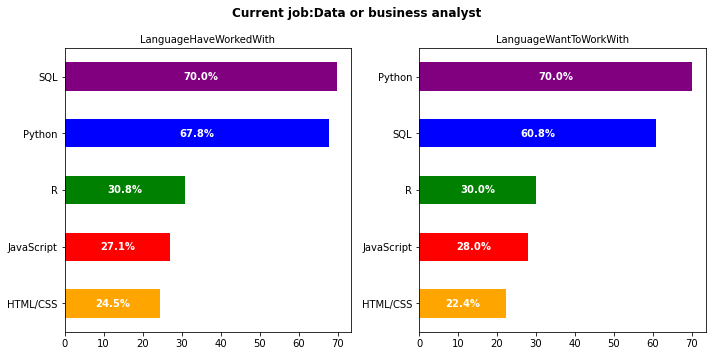

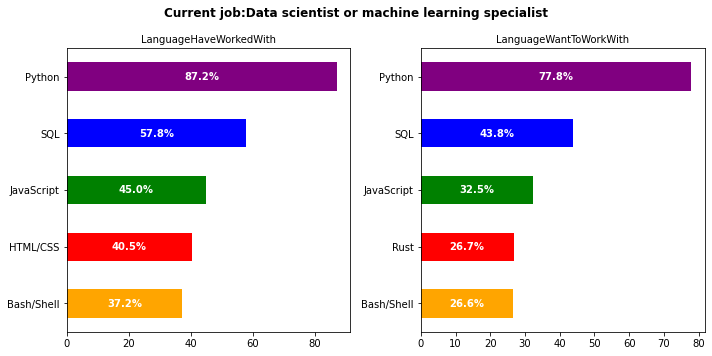

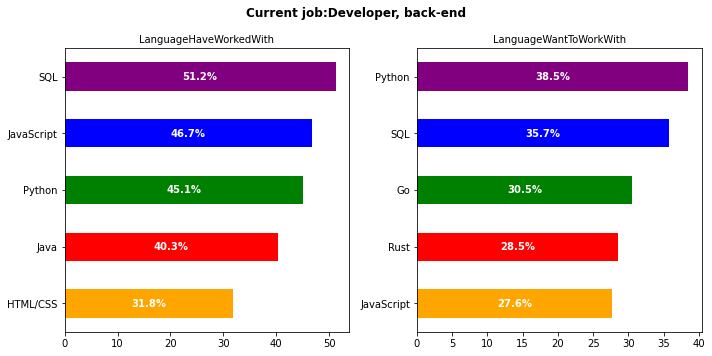

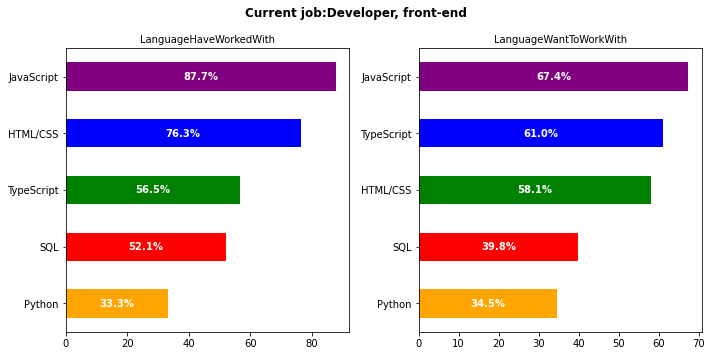

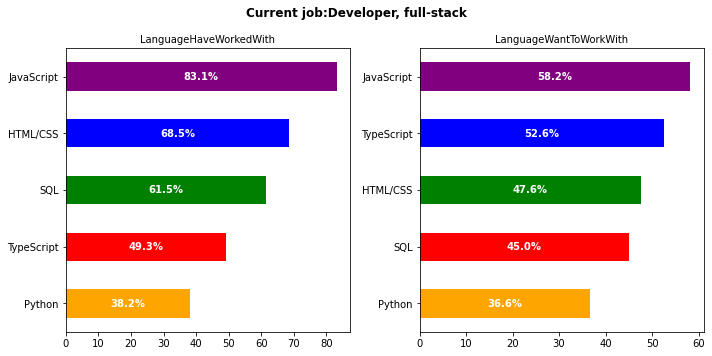

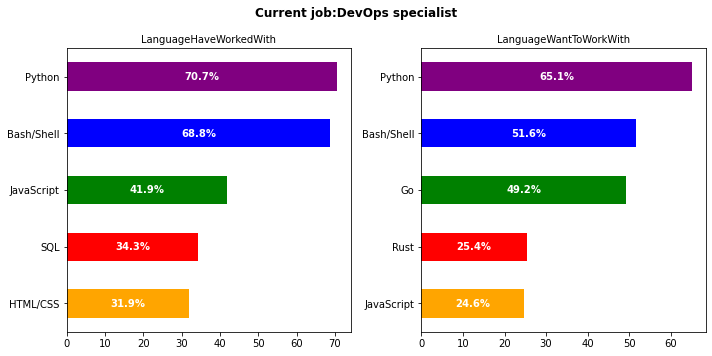

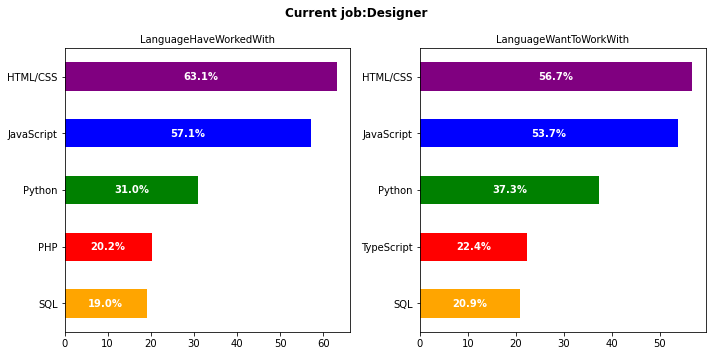

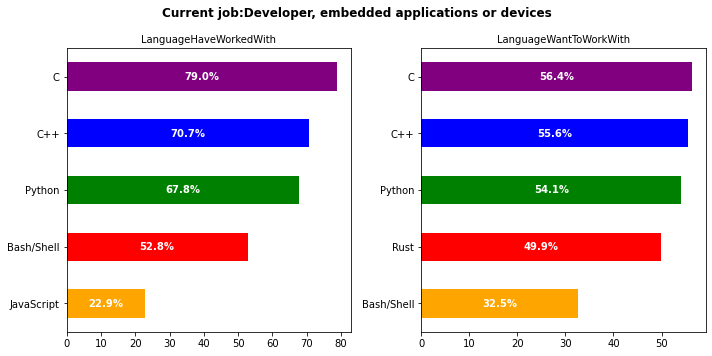

In [67]:
all_roles=['Data or business analyst',
'Data scientist or machine learning specialist',
'Developer, back-end',
'Developer, front-end',
'Developer, full-stack',
'DevOps specialist',
'Designer',
'Developer, embedded applications or devices']
           
           
for role in all_roles:
    clean_and_plot('LanguageHaveWorkedWith','LanguageWantToWorkWith',role)

C:\Users\jobao\AppData\Local\Temp/ipykernel_10676/553593740.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_10676/553593740.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]


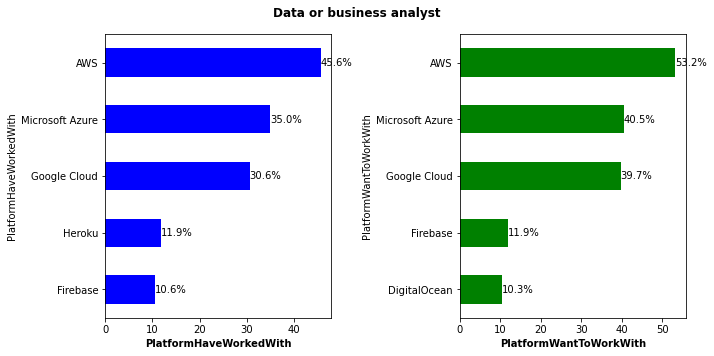

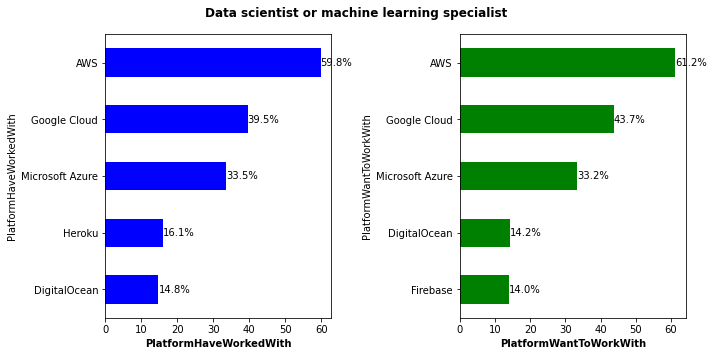

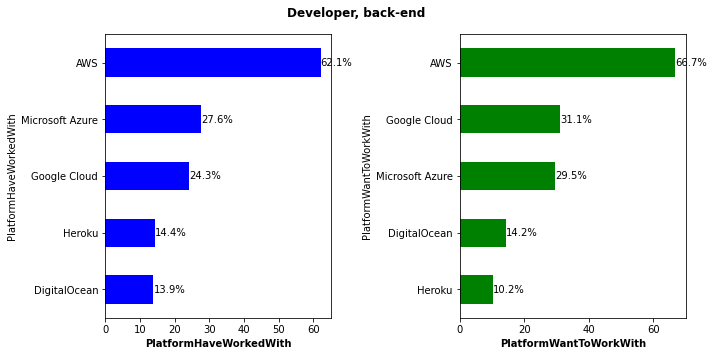

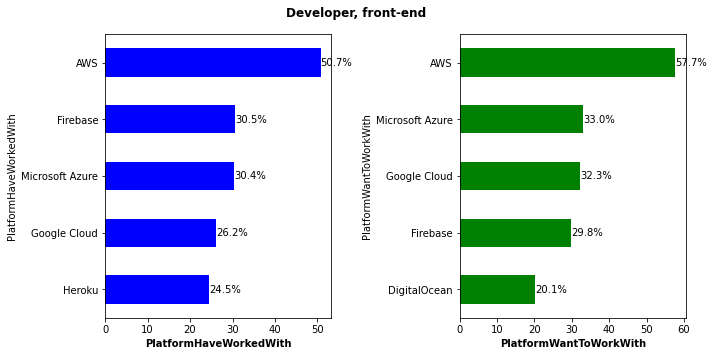

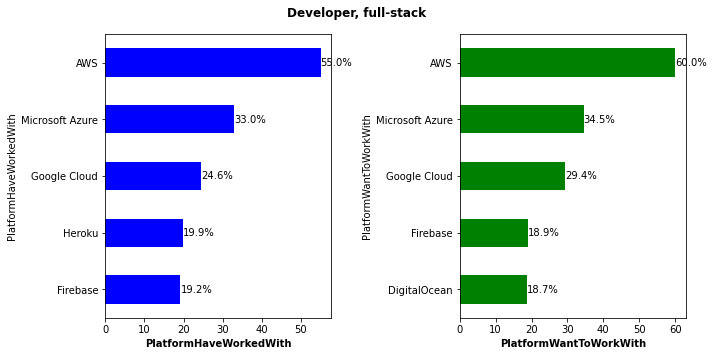

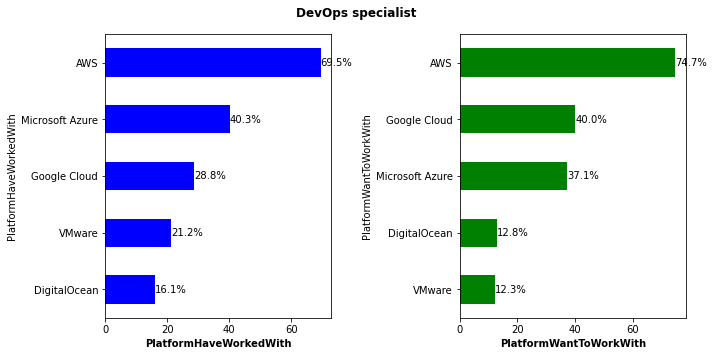

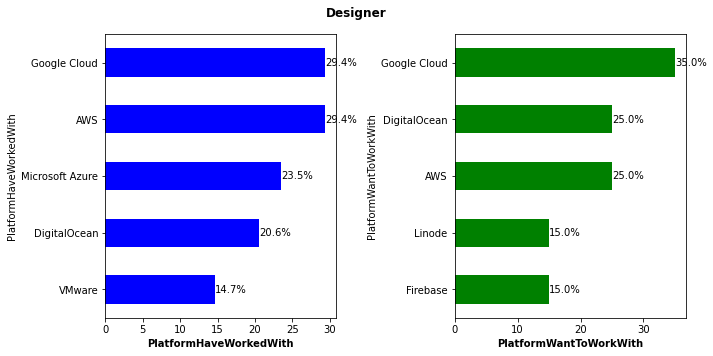

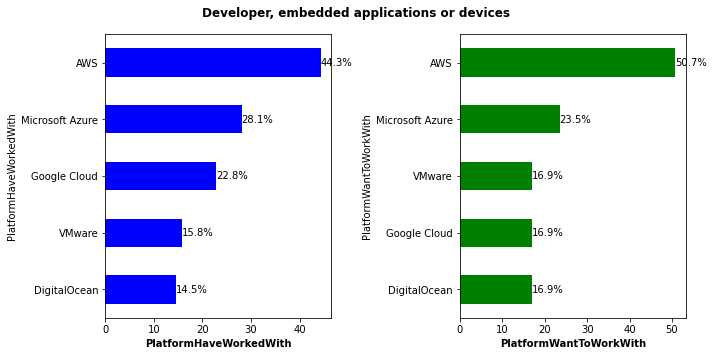

In [175]:
for role in all_roles:
    clean_and_plot('PlatformHaveWorkedWith','PlatformWantToWorkWith',role)
    

In [593]:
df_lang.groupby(['DevType'])['LanguageHaveWorkedWith'].value_counts()

DevType               LanguageHaveWorkedWith
Academic researcher   Python                    396
                      C++                       201
                      Bash/Shell                184
                      C                         165
                      R                         145
                                               ... 
System administrator  Groovy                      1
                      LISP                        1
                      Objective-C                 1
                      Scala                       1
                      Solidity                    1
Name: LanguageHaveWorkedWith, Length: 1153, dtype: int64

In [617]:
#f=df_lang.groupby(['DevType'])['LanguageHaveWorkedWith'].value_counts(normalize=True).mul(100).unstack().fillna(0)
g=df_lang_wanted.groupby(['DevType'])['LanguageWantToWorkWith'].value_counts(normalize=True).mul(100).unstack().fillna(0)
f.sum(axis=1)

DevType
Academic researcher                              1.0
Blockchain                                       1.0
Cloud infrastructure engineer                    1.0
Data or business analyst                         1.0
Data scientist or machine learning specialist    1.0
Database administrator                           1.0
Designer                                         1.0
DevOps specialist                                1.0
Developer, QA or test                            1.0
Developer, back-end                              1.0
Developer, desktop or enterprise applications    1.0
Developer, embedded applications or devices      1.0
Developer, front-end                             1.0
Developer, full-stack                            1.0
Developer, game or graphics                      1.0
Developer, mobile                                1.0
Educator                                         1.0
Engineer, data                                   1.0
Engineer, site reliability            

<AxesSubplot:xlabel='LanguageHaveWorkedWith'>

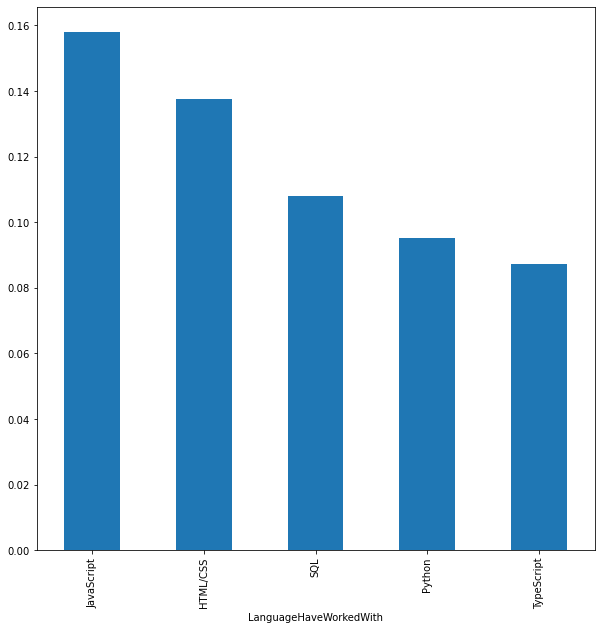

In [602]:
plt.figure(figsize=(10,10))
f.T['Data or business analyst'].sort_values(ascending=False).head(5).plot(kind="bar", stacked=True)
f.T['Data scientist or machine learning specialist'].sort_values(ascending=False).head(5).plot(kind="bar", stacked=True)
f.T['Developer, full-stack'].sort_values(ascending=False).head(5).plot(kind="bar", stacked=True)
f.T['Developer, back-end'].sort_values(ascending=False).head(5).plot(kind="bar", stacked=True)
f.T['DevOps specialist'].sort_values(ascending=False).head(5).plot(kind="bar", stacked=True)
f.T['Developer, front-end'].sort_values(ascending=False).head(5).plot(kind="bar", stacked=True)
f.T['Designer'].sort_values(ascending=False).head(5).plot(kind="bar", stacked=True)

pl



In [469]:
#Unique_current_languages
dd=df_clean['LanguageHaveWorkedWith'].value_counts().reset_index()
dd.rename(columns={ 'LanguageHaveWorkedWith': 'count'}, inplace=True)

dd

,index,count
0,HTML/CSS;JavaScript;TypeScript,2148
1,HTML/CSS;JavaScript;PHP;SQL,1843
2,C#;HTML/CSS;JavaScript;SQL;TypeScript,1451
3,C#;HTML/CSS;JavaScript;SQL,1384
4,Python,1279
...,...,...
21519,Bash/Shell;Dart;Go;HTML/CSS;JavaScript;Python;...,1
21520,C;C++;JavaScript;MATLAB;Python;SQL;TypeScript,1
21521,Bash/Shell;C;C++;Go;Lua;Python,1
21522,Go;Perl;PHP;Python;SQL,1


In [470]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df


In [471]:
gg=total_count(dd,'index','count',Unique_current_languages)


In [472]:
gg

,index,count
20,C,130671
33,Java,129270
14,JavaScript,116378
25,HTML/CSS,98440
10,SQL,96460
3,Python,79096
11,TypeScript,65287
26,Bash/Shell,56496
34,C#,53657
2,PHP,43068


### Learn how to code 

In [36]:
df_clean[['LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert']]

,LearnCode,LearnCodeOnline,LearnCodeCoursesCert
0,"[Books / Physical media, Friend or family memb...","[Technical documentation, Blogs, Programming G...",NaN
1,"[Books / Physical media, School (i.e., Univers...",NaN,NaN
2,"[Other online resources (e.g., videos, blogs, ...","[Technical documentation, Blogs, Stack Overflo...",NaN
3,[Online Courses or Certification],NaN,"[Coursera, Udemy]"
4,"[On the job training, Coding Bootcamp]",NaN,NaN
...,...,...,...
1764589,NaN,NaN,NaN
1768822,NaN,NaN,NaN
1773947,NaN,NaN,NaN
1774051,NaN,NaN,NaN


In [51]:
#Calling the function to obtain the possible(unique) answers for the necessary columns

df_clean['LearnCode']= split_multiple_answers(df_new,'LearnCode')
df_clean['LearnCodeOnline']=split_multiple_answers(df_new,'LearnCodeOnline')
df_clean['LearnCodeCoursesCert']=split_multiple_answers(df_new,'LearnCodeCoursesCert')


C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/641629510.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.split(';')


In [91]:
f.T[role]/(df_clean[df_clean['DevType'] == role]).shape[0]

LearnCodeCoursesCert
Codecademy     0.031284
Coursera       0.057229
Other          0.028351
Pluralsight    0.039218
Skillsoft      0.002106
Udacity        0.019553
Udemy          0.101335
edX            0.023801
Name: Developer, back-end, dtype: float64

C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/1462461740.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/1462461740.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]
C:\Users\jobao\AppData\Local\Temp/ipykernel_1660/1462461740.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]


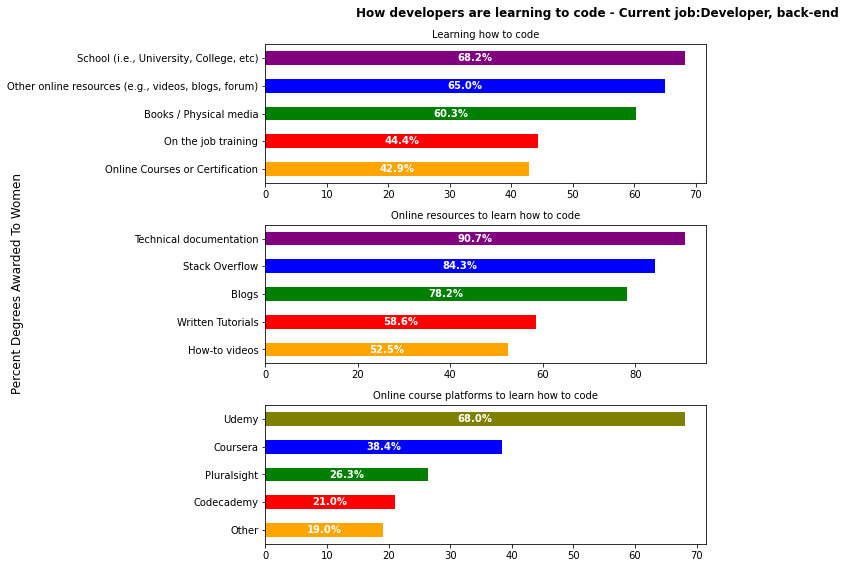

In [59]:
def clean_and_plot(role):
    col1 = 'LearnCode'
    col2 = 'LearnCodeOnline'
    col3 = 'LearnCodeCoursesCert'

    df1=df_clean[col1].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col1], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col1], value_name = col1)\
       .dropna(subset=[col1])\
       .drop("variable", axis=1) 

    f=df1.groupby(['DevType'])[col1].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col1])[df_clean['DevType'] ==role]).shape[0]
    
    df2=df_clean[col2].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col2], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col2], value_name = col2)\
       .dropna(subset=[col2])\
       .drop("variable", axis=1) 

    #g=df2.groupby(['DevType'])[col2].value_counts(normalize=True).mul(100).unstack().fillna(0)  
    g=df2.groupby(['DevType'])[col2].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col2])[df_clean['DevType'] ==role]).shape[0]

    
    df3=df_clean[col3].apply(pd.Series) \
       .merge(df_clean, right_index = True, left_index = True) \
       .drop([col3], axis = 1) \
       .melt(id_vars = df_new.loc[:,df_new.columns!=col3], value_name = col3)\
       .dropna(subset=[col3])\
       .drop("variable", axis=1) 

    h=df3.groupby(['DevType'])[col3].value_counts().mul(100).unstack().fillna(0)/(df_clean.dropna(subset=[col3])[df_clean['DevType'] ==role]).shape[0]  
    
    fig, axs = plt.subplots(3,figsize=(10, 8))
    #plt.figure(figsize=(20,20))
    
    f.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[0],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
    axs[0].set_title('Learning how to code', fontsize='medium')

    #axs[0].set_ylabel(col1,fontweight ='bold',fontsize='large')

    g.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[1],color=['orange', 'red', 'green', 'blue', 'purple'],xlabel='')
   # axs[1].set_ylabel(col2,fontweight ='bold',fontsize='medium')
    axs[1].set_title('Online resources to learn how to code', fontsize='medium')
    
    h.T[role].sort_values().tail(5).plot(kind='barh', ax=axs[2],color=['orange', 'red', 'green', 'blue', 'olive'],xlabel='')
    #axs[2].set_ylabel(col3,fontweight ='bold',fontsize='medium')
    axs[2].set_title('Online course platforms to learn how to code', fontsize='medium')


    for c in axs[0].containers:
    # set the bar label
        axs[0].bar_label(c, fmt="%.1f%%", label_type='center',fontweight ='bold',color='white')
    for c in axs[1].containers:
    # set the bar label
        axs[1].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    for c in axs[2].containers:
    # set the bar label
        axs[2].bar_label(c, fmt='%.1f%%', label_type='center',fontweight ='bold',color='white')
    fig.suptitle(f'How developers are learning to code - Current job:{role}',fontweight ='bold',fontsize='large',ha='left')
    fig.tight_layout()
    fig.supylabel('Percent Degrees Awarded To Women')


    plt.show()
clean_and_plot('Developer, back-end')

In [119]:
(df_clean.dropna(subset=['LearnCode'])[df_clean['DevType'] =='Developer, back-end']).shape[0]
(df_cleandf_clean[df_clean['DevType'] =='Developer, back-end']).shape[0]

C:\Users\jobao\AppData\Local\Temp/ipykernel_10676/4125361866.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (df_clean.dropna(subset=['LearnCode'])[df_clean['DevType'] =='Developer, back-end']).shape[0]


10478

<AxesSubplot:ylabel='LearnCode'>

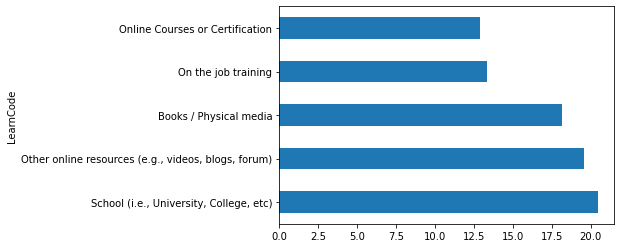

In [55]:
f.T[role].sort_values(ascending=False).head(5).plot(kind = 'barh')

In [229]:
df_clean.groupby('DevType')['EdLevel'].value_counts()
#df_clean.groupby(['DevType'])['LearnCode'].value_counts()

DevType               EdLevel                                                                           
Academic researcher   Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       975
                      Other doctoral degree (Ph.D., Ed.D., etc.)                                            754
                      Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          595
                      Some college/university study without earning a degree                                167
                      Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     85
                                                                                                           ... 
System administrator  Associate degree (A.A., A.S., etc.)                                                   222
                      Other doctoral degree (Ph.D., Ed.D., etc.)                                            159

In [86]:
data=pd.DataFrame()
for role in all_roles:
    f = df_clean[~df_clean['EdLevel'].isin(['Primary/elementary school','Something else'])]\
    .groupby('DevType')['EdLevel'].value_counts().unstack().fillna(0).mul(100).loc[role]\
    /(df_clean[df_clean['DevType']==role].shape[0])
    data = data.append(f)
    
#df_clean.groupby('DevType')['EdLevel'].value_counts().unstack().fillna(0).mul(100).loc['Designer']/df_clean[df_clean['DevType']=='Designer'].shape[0]
data

,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other doctoral degree (Ph.D., Ed.D., etc.)","Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree
Data or business analyst,3.436426,41.611996,28.303655,4.873477,2.655420,4.154952,12.433614
Data scientist or machine learning specialist,1.080607,30.315421,40.478972,15.741822,1.518692,2.978972,6.045561
"Developer, back-end",3.188569,47.249483,24.053393,2.203422,1.789810,6.283136,12.836999
"Developer, front-end",3.971096,47.426956,18.743324,1.344643,2.029532,8.149544,15.199497
"Developer, full-stack",3.581757,47.848507,21.521898,1.864047,1.836173,6.923104,13.853176
DevOps specialist,3.938412,43.905997,25.623987,2.333874,1.442464,5.494327,14.764992
Designer,4.250797,39.665250,18.039320,2.444208,2.736451,10.095643,17.667375
"Developer, embedded applications or devices",2.600051,40.020393,28.345654,3.517716,2.243181,6.627581,13.459087


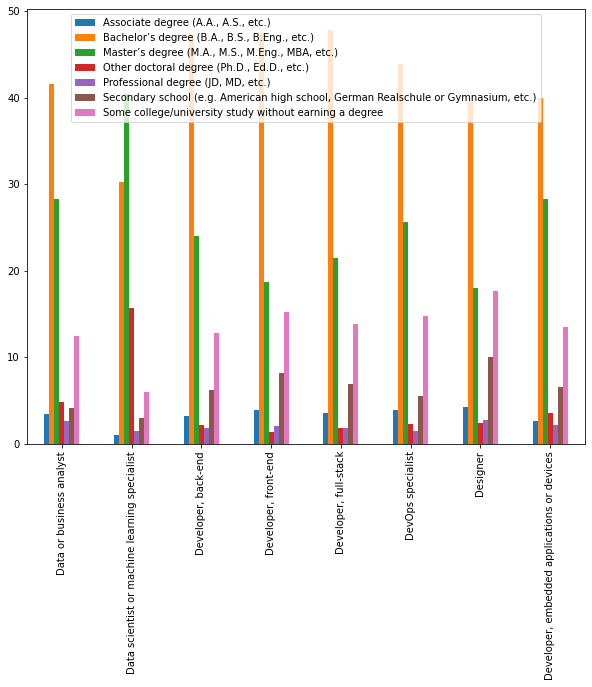

In [101]:
#data.sort_values(['Associate degree (A.A., A.S., etc.)','Bachelor’s degree (B.A., B.S., B.Eng., etc.)','Master’s degree (M.A., M.S., M.Eng., MBA, etc.)','Other doctoral degree (Ph.D., Ed.D., etc.)','Professional degree (JD, MD, etc.)','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)','Some college/university study without earning a degree'],ascending=False).plot(kind='bar',figsize=(10,8))
data.sort_values(rows,axis=0,ascending=False).plot(kind='bar',figsize=(10,8))
plt.legend(loc ='upper center')

In [96]:
data.sort_values(['Data scientist or machine learning specialist','Developer, embedded applications or devices'])

KeyError: 'Data scientist or machine learning specialist'

In [228]:
df_clean.groupby(['EdLevel']).count()


,ResponseId,MainBranch,Employment,RemoteWork,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,OrgSize,...,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,WorkExp,DevType
EdLevel,,,,,,,,,,,,,,,,,,,,,
"Associate degree (A.A., A.S., etc.)",5597,5597,5597,5367,1988,1432,920,5579,4617,4576,...,5241,5565,5568,5361,3887,2676,5090,3947,3369,5597
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",70836,70836,70836,68698,28053,19359,12331,70638,60900,60305,...,67713,70155,70699,69082,50794,36123,65566,52572,45414,70836
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",39078,39078,39078,38509,14761,9784,5963,38922,35460,34778,...,37597,38695,38937,37880,27474,19826,36420,29882,24898,39078
"Other doctoral degree (Ph.D., Ed.D., etc.)",6040,6040,6040,6000,2058,1248,535,6018,5556,5480,...,5847,5981,6026,5714,3402,2294,5663,4554,3360,6040
Primary/elementary school,2397,2397,2397,2114,617,460,212,2310,1294,1308,...,2073,2276,2321,2085,1474,1021,1646,1163,993,2397
"Professional degree (JD, MD, etc.)",3298,3298,3298,3218,1043,685,476,3284,2835,2788,...,3156,3273,3289,3086,2149,1495,2872,2294,1837,3298
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",11832,11832,11832,10872,4102,3258,1576,11768,7244,7177,...,11150,11753,11802,11303,7547,5270,9826,7198,5145,11832
Some college/university study without earning a degree,23140,23140,23140,22091,7780,5941,3313,23040,18073,17894,...,21989,22941,23059,22297,15722,10874,20506,15843,13088,23140
Something else,2356,2356,2356,2188,787,545,296,2346,1709,1636,...,2155,2270,2337,2158,1383,939,1946,1385,1190,2356
